In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm

%run ../Scripts/analysisMethods.py
%run ../Scripts/supMethods.py
%run ../Scripts/entropy.py
%run ../Scripts/trajectory.py
foldername = "../Data_temp_name9/beta0_seed0"
foldername = "../Data_HGT_rate_Single3"

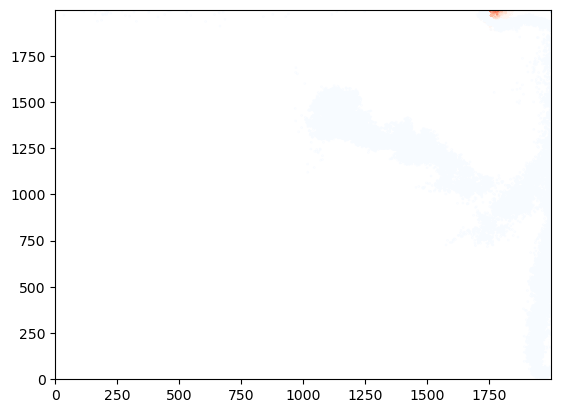

In [24]:
t_dom = get_tdomain(foldername, margins = (0, 0))
params, sim_params = read_json(foldername)

In [25]:
%run ../Scripts/fitness.py
%run ../Scripts/mutation.py

In [26]:
entropy_change_time = []
entropy_change_mutation_time = []
entropy_change_growth_time = []
entropy_change_remainder_time = []
t_range = []
n_old, nh_old, f_old = load_outputs(foldername, t_dom[0], True)

for t in t_dom[1:200]:
    n_new, nh_new, f_new = load_outputs(foldername, t, True)
    f_norm = norm_fitness(f_new, n_old, params, sim_params)
    n_intermediate = virus_growth(n_old, f_norm, params, sim_params)
    n_mutated = mutation(n_intermediate, params, sim_params)

    entropy_change_growth = compute_entropy_change(n_intermediate, n_old)
    entropy_change_remainder = compute_entropy_change(n_new, n_intermediate)
    # entropy_change_mutation = compute_entropy_production_2D_mutation(n_intermediate, params, sim_params)
    entropy_change_mutation = compute_entropy_change(n_mutated, n_intermediate)
    entropy_change = compute_entropy_change(n_new, n_old)

    entropy_change_time.append(entropy_change)
    entropy_change_mutation_time.append(entropy_change_mutation)
    entropy_change_growth_time.append(entropy_change_growth)
    entropy_change_remainder_time.append(entropy_change_remainder)
    t_range.append(t)
    n_old = n_new


In [27]:
sigma = params["sigma"]
D = params["D"]
N = params["N0"]
s = params["s"]

first_dim_Ent_prod = compute_entropy_production_Gaussian(sigma, D, 1, N = 1, dim = 1)
second_dim_Ent_prod = compute_entropy_production_Gaussian(np.sqrt(1.66*sigma), D, 1, N = 1, dim = 1)
mutation_Ent_prod = N*(first_dim_Ent_prod+second_dim_Ent_prod)
print("Mutation Entropy Expected: ", mutation_Ent_prod)

Mutation Entropy Expected:  285.0501815480445


In [28]:
fitness_Ent_prod = N*(np.log(1.66*sigma/(1.66*sigma+4*D))+(1/2)*np.log(1-sigma*s**2))

print("Fitness Entropy Expected: ", fitness_Ent_prod)

Fitness Entropy Expected:  -279.9494753808958


In [29]:
%run ../Scripts/formulas.py

In [30]:
entropy_change_mutation_filtered = running_median_filter(entropy_change_mutation_time, 25, padding = 'symmetric')
entropy_change_growth_filtered = running_median_filter(entropy_change_growth_time, 25, padding = 'symmetric')
entropy_change_filtered = running_median_filter(entropy_change_time, 25, padding = 'symmetric')

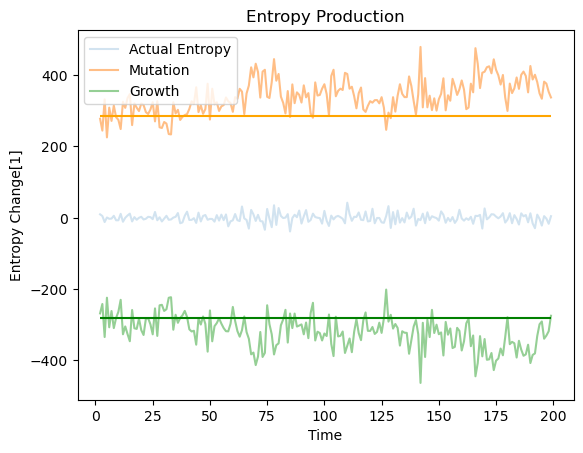

In [33]:
plt.figure()
plt.plot(t_range[1:], entropy_change_time[1:], alpha = 0.2, label = "Actual Entropy")

plt.plot(t_range[1:], entropy_change_mutation_time[1:], alpha = 0.5, label = "Mutation")
plt.plot(t_range[1:], entropy_change_growth_time[1:], alpha = 0.5, label = "Growth")
plt.hlines(mutation_Ent_prod, t_range[1], t_range[-1], colors = "orange")
plt.hlines(fitness_Ent_prod, t_range[1], t_range[-1], colors = "green")
plt.title("Entropy Production")
plt.ylabel("Entropy Change[1]")
plt.xlabel("Time")
plt.legend()